## The Spark Foundation- Data Science and Business Analytics Internship

### Task 1: Prediction using supervised machine learning

### Problem Statement: Predict the percentage of an student based on the no. of study hours
### Prediction of score if a student studies for 9.25 hrs/day

### Author: Sakshi Lalit Chopada

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score 

In [3]:
#Load data
data=pd.read_csv("http://bit.ly/w-data")

In [4]:
#Display first 5 rows of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


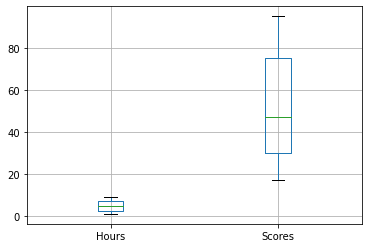

In [8]:
#Ploting box plot
box_plot=data.boxplot(column=["Hours","Scores"])

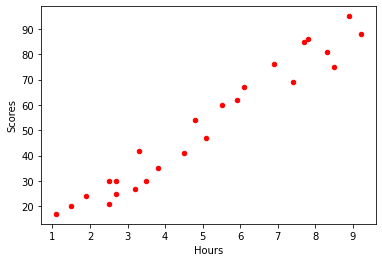

In [9]:
#Plotting distribution of scores
data.plot(kind="scatter",x="Hours",y="Scores",color="red")
plt.show()

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Above graph shows positive relationship between Hours and Scores

### Preparing data

In [11]:
#Separating data as a input and output
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Training the model

In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

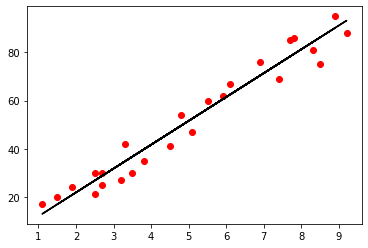

In [14]:
#Plotting regression line
r_line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y,color="red")
plt.plot(x,r_line,color="black")
plt.show()

### Prediction

In [15]:
y_pred=regressor.predict(x_test)

In [16]:
#Comparing actual and  predicted scores
dfrem=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
dfrem

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Prediction of score if a student studies for 9.25 hrs/day

In [19]:
hrs=9.25
hrs1=np.array(hrs).reshape(1,-1)
predict_own=regressor.predict(hrs1)
print("No. of Hours: {}".format(hrs))
print("Predicted Score: {}".format(predict_own[0]))

No. of Hours: 9.25
Predicted Score: 93.69173248737538


### Evaluation of model

In [20]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Mean absolute error: 4.183859899002975
R2 score: 0.9454906892105356
